In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier


In [269]:
# Load the breast cancer dataset
df = pd.read_csv(r"D:\aml\random forest\random forest classification\diabetes.csv")

In [270]:
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [272]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [273]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [274]:
df.isnull().sum().sum()

0

In [275]:
df= df.dropna()

In [277]:
X= df.drop('Outcome', axis =1)

In [278]:
y = df.Outcome

In [279]:
print(X)
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [280]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [281]:
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [356]:
rf = RandomForestClassifier(n_estimators=20, max_depth=4)

# Fit the model to the training data
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=20)

In [357]:
# Get the feature importances and plot them
importance ={'features' : rf.feature_names_in_, 'importance': rf.feature_importances_}
importance = pd.DataFrame(importance)
importance


,features,importance
0,Pregnancies,0.064723
1,Glucose,0.367450
2,BloodPressure,0.028625
3,SkinThickness,0.037125
4,Insulin,0.067310
5,BMI,0.189123
6,DiabetesPedigreeFunction,0.075072
7,Age,0.170572


In [358]:
# Make predictions on the test data
y_pred = rf.predict(X_test)

# Print the accuracy score of the model on the test data
print("Accuracy:", rf.score(X_test, y_test))

Accuracy: 0.7597402597402597


In [359]:
dtree = DecisionTreeClassifier(max_depth=4)
dtree = dtree.fit(X_train, y_train)

In [360]:
y_pred_dtree=dtree.predict(X_test)

In [361]:
y_pred_dtree.shape

(154,)

In [362]:
# Print the accuracy score of the model on the test data
print("Accuracy RF:", rf.score(X_test, y_test))
# Print the accuracy score of the model on the test data
print("Accuracy DT:", dtree.score(X_test, y_test))

Accuracy RF: 0.7597402597402597
Accuracy DT: 0.6948051948051948


In [363]:
print('Precision RF: %.3f' % precision_score(y_test, y_pred))
print('Precision DT: %.3f' % precision_score(y_test, y_pred_dtree))

Precision RF: 0.688
Precision DT: 0.559


In [364]:
print('Recall RF: %.3f' % recall_score(y_test, y_pred, average='macro'))
print('Recall DT: %.3f' % recall_score(y_test, y_pred_dtree, average='macro'))

Recall RF: 0.724
Recall DT: 0.694


In [365]:
print('F1 Score RF: %.3f' % f1_score(y_test, y_pred, average='macro'))
print('F1 Score DT: %.3f' % f1_score(y_test, y_pred_dtree, average='macro'))

F1 Score RF: 0.730
F1 Score DT: 0.682


In [366]:
confusion_matrix_RF = confusion_matrix(y_test, y_pred)
confusion_matrix_DF = confusion_matrix(y_test, y_pred_dtree)

In [367]:
print(confusion_matrix_RF)
print(confusion_matrix_DF)

[[84 15]
 [22 33]]
[[69 30]
 [17 38]]


In [400]:
# Define a range of tree depths to explore
depths = [1,2,3,4,5,6,7,8]

# Lists to store accuracy, bias, and variance values
accuracy_dt = []
bias_dt = []
variance_dt = []
accuracy_rf = []
bias_rf = []
variance_rf = []

In [401]:
# Loop over different tree depths
for depth in depths:
    # Decision Tree
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    y_pred_dt = dt.predict(X_test)
    accuracy_dt.append(accuracy_score(y_test, y_pred_dt))
    bias_dt.append(1 - accuracy_score(y_test, y_pred_dt))
    variance_dt.append(np.var(y_pred_dt))

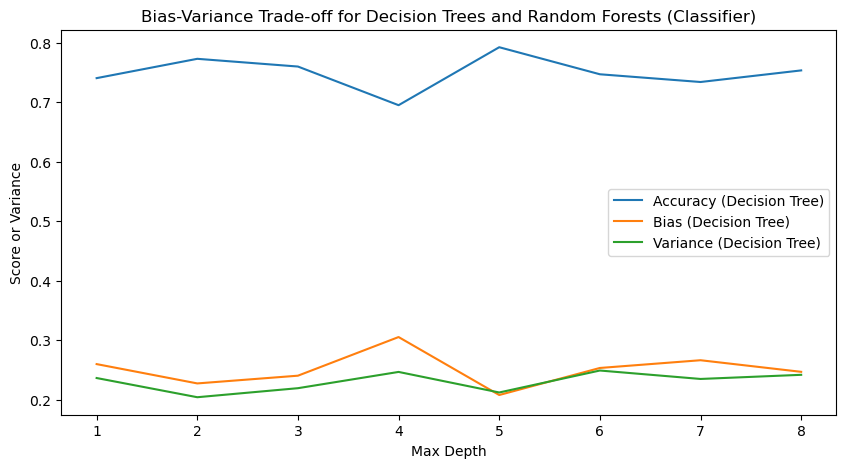

In [402]:
plt.figure(figsize=(10, 5))
plt.plot(depths, accuracy_dt, label="Accuracy (Decision Tree)")
plt.plot(depths, bias_dt, label="Bias (Decision Tree)")
plt.plot(depths, variance_dt, label="Variance (Decision Tree)")
plt.xlabel("Max Depth")
plt.ylabel("Score or Variance")
plt.legend()
plt.title("Bias-Variance Trade-off for Decision Trees and Random Forests (Classifier)")
plt.show()

In [403]:
# Random Forest
for depth in depths:
    rf = RandomForestClassifier(max_depth=depth, n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    accuracy_rf.append(accuracy_score(y_test, y_pred_rf))
    bias_rf.append(1 - accuracy_score(y_test, y_pred_rf))
    variance_rf.append(np.var(y_pred_rf))


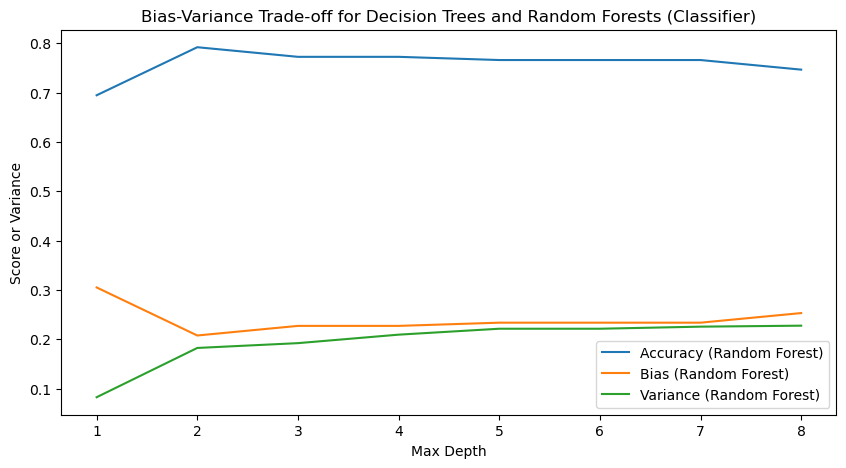

In [404]:
plt.figure(figsize=(10, 5))
plt.plot(depths, accuracy_rf, label="Accuracy (Random Forest)")
plt.plot(depths, bias_rf, label="Bias (Random Forest)")
plt.plot(depths, variance_rf, label="Variance (Random Forest)")
plt.xlabel("Max Depth")
plt.ylabel("Score or Variance")
plt.legend()
plt.title("Bias-Variance Trade-off for Decision Trees and Random Forests (Classifier)")
plt.show()
